# 1. Load Library

In [1]:
import pandas as pd
import numpy as np
np.random.seed(1234)
from sklearn import preprocessing
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)  

# 2. Data Processing

### Load Data

In [2]:
# load data, drop columns that are 'n/a'

data = [pd.read_csv(file, sep=' ', header=None) for file in ['data/train_FD001.txt','data/test_FD001.txt','data/RUL_FD001.txt']]
[f.drop(f.columns[[-1,-2]], axis=1, inplace=True) for f in data[0:2]]           # drop 'n/a' for test1/train1
data[2].drop(data[2].columns[[-1]], axis=1, inplace=True)                       # drop 'n/a' for test1/train1/rul1
header = ['id','cycle'] + ['setting'+str(i) for i in range(1,3+1)] + ['s'+str(j) for j in range(1,21+1)]
for k in range(2): data[k].columns = header

In [3]:
pd.DataFrame(np.array([[np.shape(dd)[0] for dd in data], [np.shape(ff)[1] for ff in data]]), index=['#rows', '#columns'], columns=['train','test','RUL'])

,train,test,RUL
#rows,20631,13096,100
#columns,26,26,1


In [4]:
data[0].describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,0.267087,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


### Create Labels

In [5]:
data[0].head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
# training data
# add rul' (remaining useful life) = 'max' - 'cycle' for regression
# add w1, w2 for multi-class classification

w1, w2 = 15, 30
data[0]['rul'] = data[0].groupby('id')['cycle'].transform('max') - data[0]['cycle']
data[0]['w1'] = np.where(data[0]['rul'] > w1, 0, 1)
data[0]['w2'] = np.where(data[0]['rul'] > w2, 0, 1)
data[0]['w2'] = data[0]['w2'] + data[0]['w1']

In [8]:
# testing data
# add'rul' considers ground truth data from RUL_FD00*.txt, used for validation purpose
# handle ground truth data first

data[2].columns = ['truth']
data[2]['id'] = data[2].index + 1
data[1] = data[1].merge(data[2], on=['id'], how='left')
data[1]['rul'] = data[1].groupby('id')['cycle'].transform('max') + data[1]['truth'] - data[1]['cycle']
data[1]['w1'] = np.where(data[1]['rul'] > w1, 0, 1)
data[1]['w2'] = np.where(data[1]['rul'] > w2, 0, 1)
data[1]['w2'] = data[1]['w2'] + data[1]['w1']
data[1].drop(['truth'], axis = 1, inplace=True)

In [9]:
# assign to separate data sets for easier to manage

train, test, _ = data

In [12]:
train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul,w1,w2
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0,0


In [13]:
test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul,w1,w2
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142,0,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141,0,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140,0,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139,0,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138,0,0


### Time Series

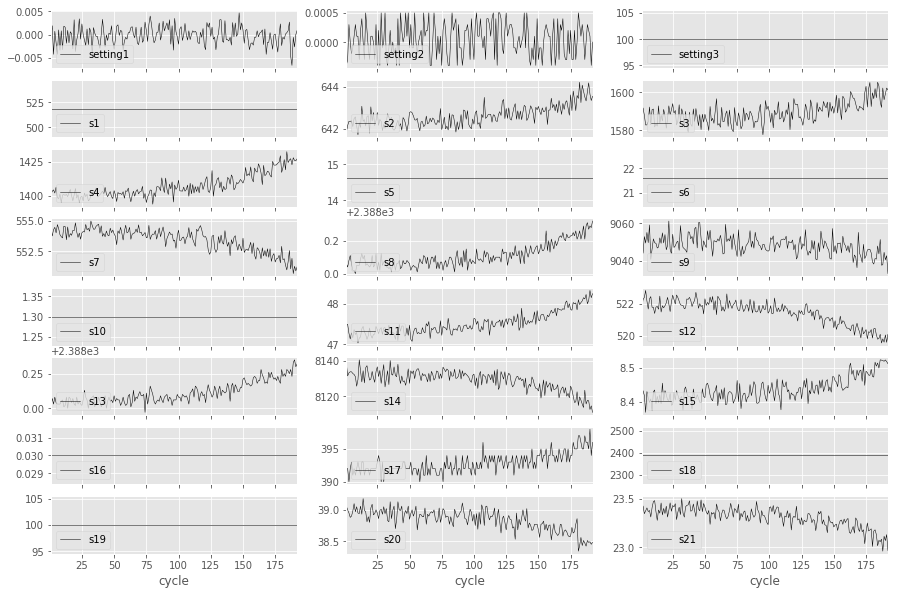

In [70]:
# look at one group of training sensor data over cycle time 

_, axes = plt.subplots(8, 3, figsize=(15, 10), sharex=True)
for index, ax in enumerate(axes.ravel()):
    if index in range(0,3):
        train[train['id']==1].plot(x='cycle', y = 'setting'+str(index+1), ax=ax, color='black', linewidth=0.5)
    if index in range(3,24):
        train[train['id']==1].plot(x='cycle', y='s'+str(index-2), ax=ax, color='black', linewidth=0.5)
    ax.legend(loc='lower left')
plt.show()

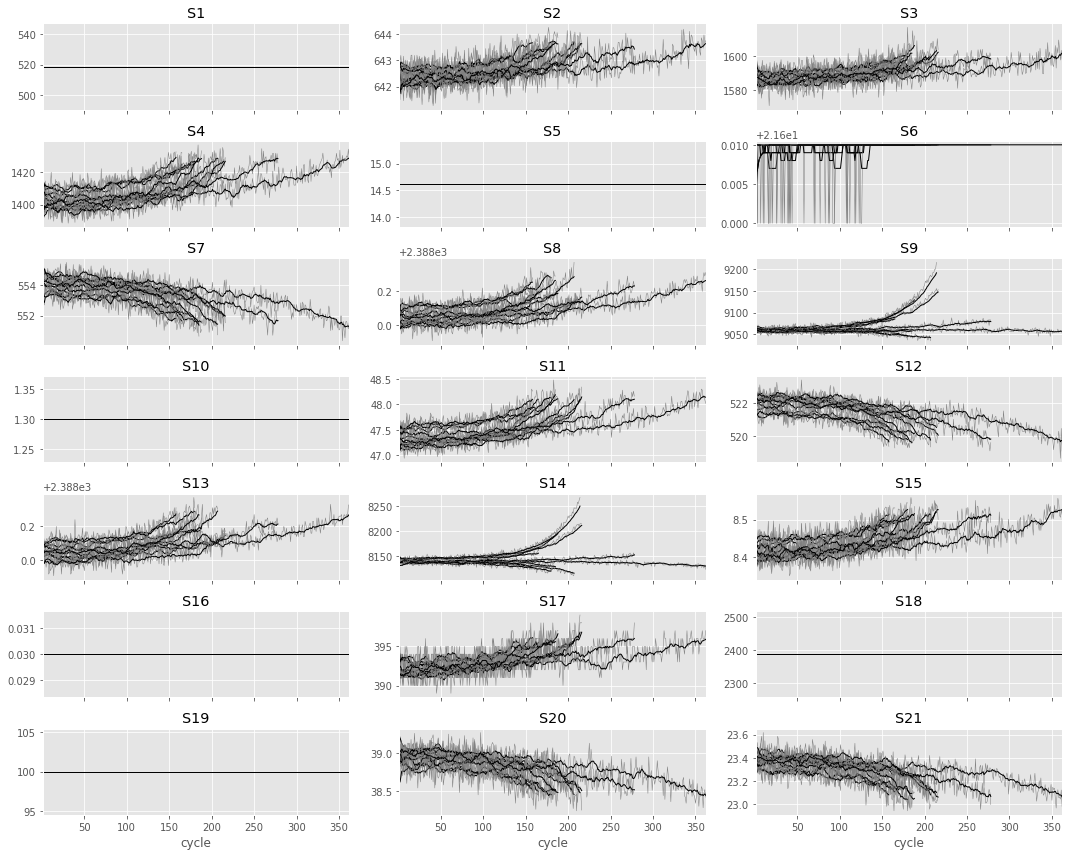

In [53]:
# Select 10 group to observe moving average

random10 = np.random.choice(train['id'].unique(), size=10, replace=False)
train_random10 = train[train['id'].isin(random10)].copy()

_, axes1 = plt.subplots(7, 3, figsize=(15, 12), sharex=True)
for index, ax in enumerate(axes1.ravel()):
    for unit_id, group in train_random10.groupby('id'):
        (group.plot(x='cycle', y='s'+str(index+1), ax=ax, color='gray', linewidth=0.5, legend=False))
        (group.rolling(window=10, on = 'cycle', min_periods=1)
             .mean().fillna(0)
             .plot(x='cycle', y='s'+str(index+1), ax=ax, color='black', linewidth=1, legend=False))
    ax.set_title(('s'+str(index+1)).title())
plt.tight_layout()
plt.show()

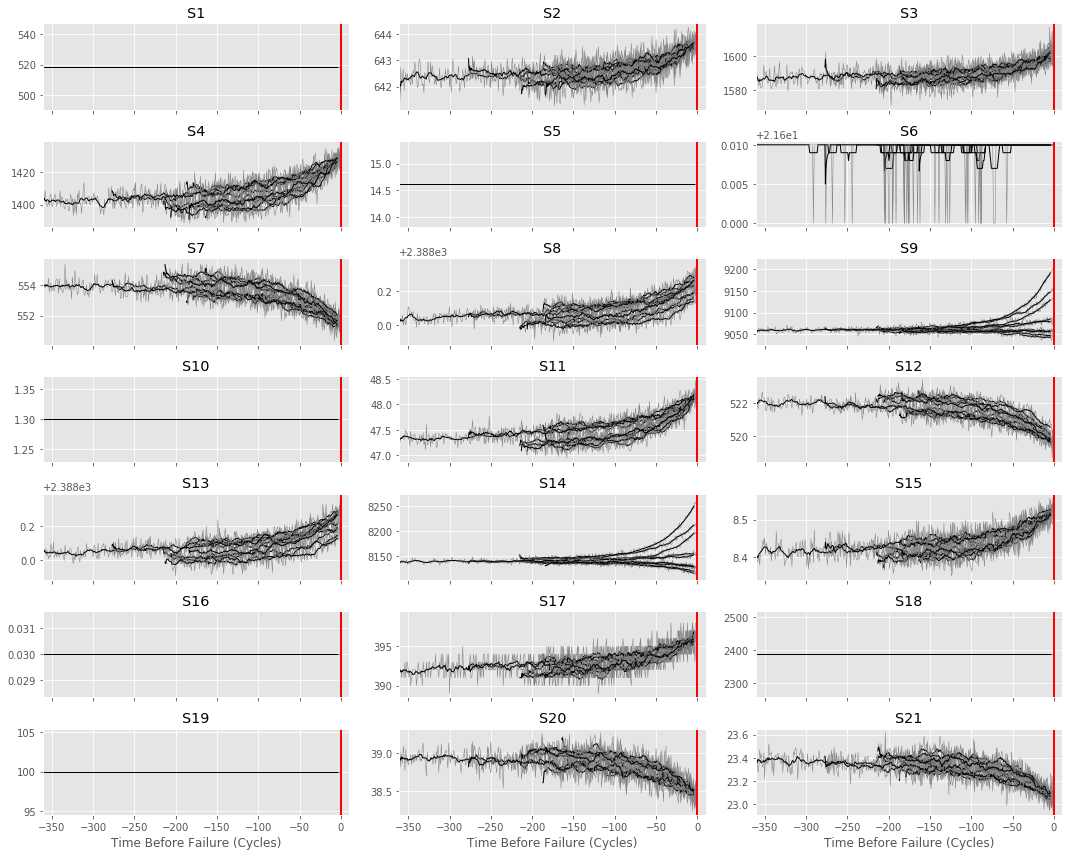

In [54]:
# Till end of life

d_plot = train_random10.copy()
d_plot['clf'] = train_random10.groupby('id')['rul'].transform('min') - d_plot['rul']
_, axes2 = plt.subplots(7, 3, figsize=(15, 12), sharex=True)
for index, ax in enumerate(axes2.ravel()):
    for unit_id, group in d_plot.groupby('id'):
        (group.plot(x='clf', y='s'+str(index+1), ax=ax, color='gray', linewidth=0.5, legend=False))
        (group.rolling(window=10, on = 'rul', min_periods=1)
             .mean().fillna(0)
             .plot(x='clf', y='s'+str(index+1), ax=ax, color='black', linewidth=1, legend=False))
    ax.set_title(('s'+str(index+1)).title())
    ax.set_xlabel("Time Before Failure (Cycles)");
    ax.axvline(x=0, color='r', linestyle='solid', linewidth=2)
    ax.set_xlim(d_plot['clf'].min(), 10)
plt.tight_layout()
plt.show()

### Normalization

In [60]:
feature = ['cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21']

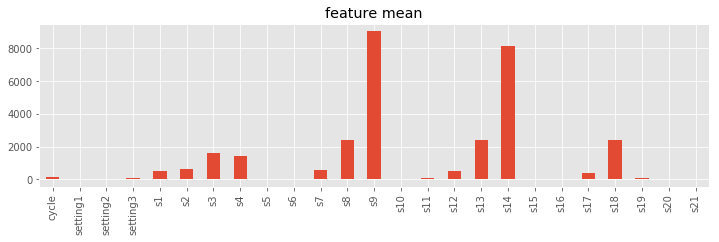

In [62]:
# the features are in quite different scales, makes sense to normalize

train[feature].mean().plot(kind='bar', figsize=(12,3), title='feature mean')

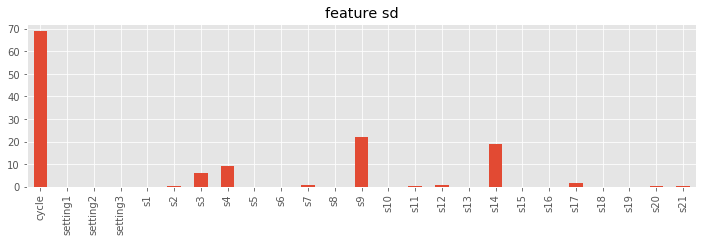

In [63]:
train[feature].std().plot(kind='bar', figsize=(12,3), title='feature sd')